<a href="https://colab.research.google.com/github/prateeksha112/coding/blob/main/Copy_of_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess the data
def load_images(image_path, img_size=(128, 128)):
    images = []
    for filename in os.listdir(image_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img = load_img(os.path.join(image_path, filename), target_size=img_size)
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
    return np.array(images)

train_images = load_images('/content/drive/MyDrive/potholes/rgb')

# Define the autoencoder model
input_img = Input(shape=(128, 128, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(train_images, train_images, epochs=50, batch_size=32, shuffle=True)

# Save the model
autoencoder.save('autoencoder_pothole_detection.h5')


Epoch 1/50
8/8 [==============================] - 18s 2s/step - loss: 0.6913
Epoch 2/50
8/8 [==============================] - 17s 2s/step - loss: 0.6912
Epoch 3/50
8/8 [==============================] - 17s 2s/step - loss: 0.6908
Epoch 4/50
8/8 [==============================] - 17s 2s/step - loss: 0.6904
Epoch 5/50
8/8 [==============================] - 17s 2s/step - loss: 0.6898
Epoch 6/50
8/8 [==============================] - 17s 2s/step - loss: 0.6894
Epoch 7/50
8/8 [==============================] - 17s 2s/step - loss: 0.6882
Epoch 8/50
8/8 [==============================] - 17s 2s/step - loss: 0.6875
Epoch 9/50
8/8 [==============================] - 17s 2s/step - loss: 0.6880
Epoch 10/50
8/8 [==============================] - 17s 2s/step - loss: 0.6882
Epoch 11/50
8/8 [==============================] - 17s 2s/step - loss: 0.6876
Epoch 12/50
8/8 [==============================] - 21s 3s/step - loss: 0.6865
Epoch 13/50
8/8 [==============================] - 19s 2s/step - loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 3s 464ms/step


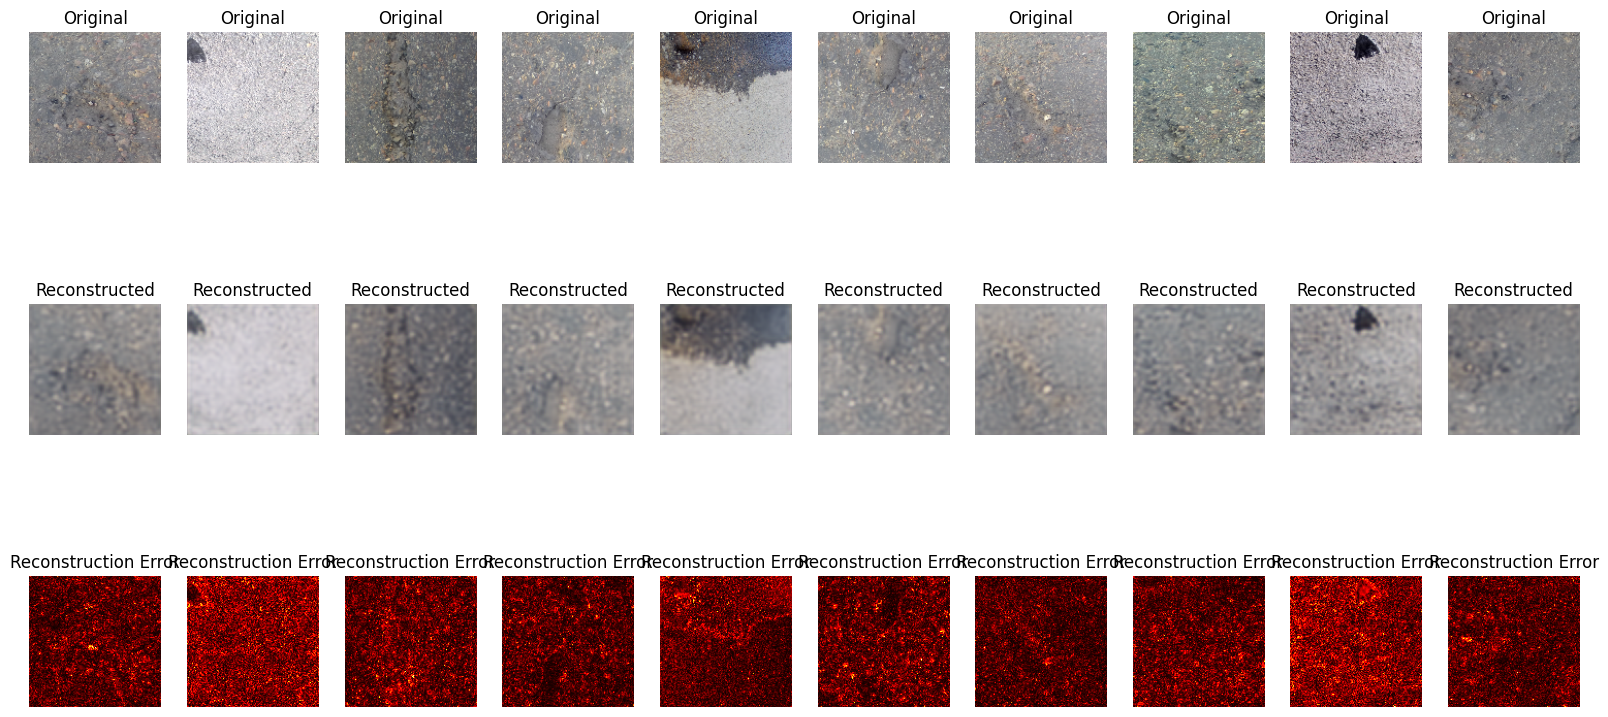

In [ ]:
# Load the trained model
autoencoder = tf.keras.models.load_model('autoencoder_pothole_detection.h5')

# Function to calculate reconstruction error
def get_reconstruction_error(original, reconstructed):
    return np.mean(np.abs(original - reconstructed), axis=-1)

# Load and preprocess the test images
test_images = load_images('/content/drive/MyDrive/potholes/rgb_test')

# Predict the reconstructed images
reconstructed_images = autoencoder.predict(test_images)

# Calculate reconstruction error
reconstruction_errors = get_reconstruction_error(test_images, reconstructed_images)

# Plot the original, reconstructed images and their reconstruction errors
n = 10  # Number of images to display
plt.figure(figsize=(20, 10))
for i in range(n):
    # Original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(test_images[i])
    plt.title("Original")
    plt.axis("off")

    # Reconstructed image
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(reconstructed_images[i])
    plt.title("Reconstructed")
    plt.axis("off")

    # Reconstruction error
    ax = plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(reconstruction_errors[i], cmap='hot')
    plt.title("Reconstruction Error")
    plt.axis("off")

plt.show()
